#### Importing the necessary libraries

In [20]:
# %pip install pandas numpy matplotlib seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#### Importing the dataset

In [21]:
df = pd.read_csv('customerchurn.csv', sep = ',') 
df.head() 

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Data preparation and cleaning
##### Understanding the Dataset

In [22]:
# dataset size
rows, columns = df.shape
print("Number of rows:", rows)
print("Number of columns:", columns)

# data types
print(df.dtypes)

# convert TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


# check missing values
print(df.isnull().sum())


# summary estatistics
print(df.describe())


Number of rows: 7043
Number of columns: 21
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract  

##### Data transformation

In [23]:
#handling missing values
df = df.dropna()
df.isnull().sum()

#checking for duplicates
duplicates = df.duplicated().sum()
print("Number of duplicate rows:", duplicates)

#removing useless columns
df = df.drop(columns=['customerID'])
# we can remove the ones we dont use at the end

Number of duplicate rows: 0


In [24]:

#checking outliers
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)]
    print(f"{col} - number of outliers: {outliers.shape[0]}")


tenure - number of outliers: 0
MonthlyCharges - number of outliers: 0
TotalCharges - number of outliers: 0


#### Data Visualization

##### Customer Tenure vs Total Charges

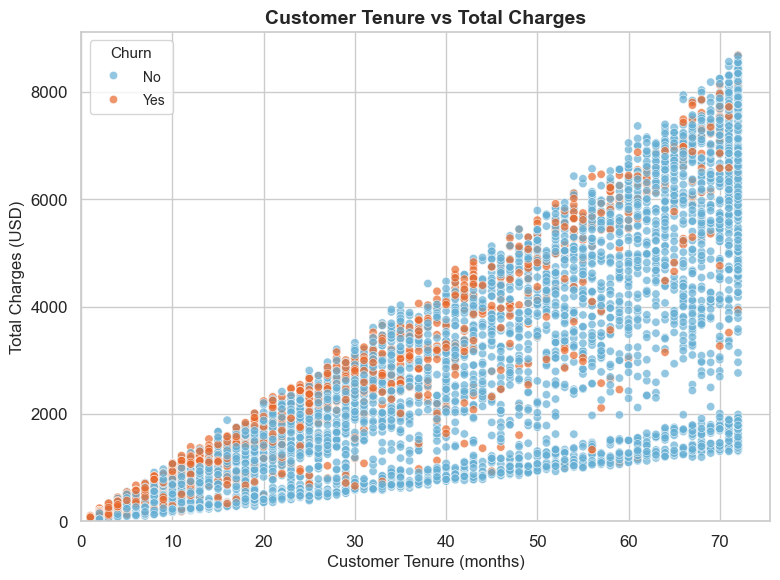

In [25]:


# Blue for "No" churn, Orange for "Yes" churn — both are color-blind friendly
custom_palette = {
    "No": "#66AFD4",   # Stayed customers
    "Yes": "#E8692D"   # Churned customers
}

# Set the visual style and font scale for readability
sns.set(style="whitegrid", font_scale=1.1)

# Create the figure and axis object
fig, ax = plt.subplots(figsize=(8, 6))

# Create a scatter plot: Tenure vs Total Charges, colored by churn status
sns.scatterplot(
    data=df,
    x='tenure',
    y='TotalCharges',
    hue='Churn',
    palette=custom_palette,
    alpha=0.7,  # Slight transparency for overlapping points
    ax=ax
)

# adding a descriptive title and axis labels
ax.set_title('Customer Tenure vs Total Charges', fontsize=14, weight='bold')
ax.set_xlabel('Customer Tenure (months)', fontsize=12)
ax.set_ylabel('Total Charges (USD)', fontsize=12)

# Ensure axes start at zero for better comparison and clarity
ax.set_xlim(left=0)
ax.set_ylim(bottom=0)

# Customize the legend for clarity and accessibility
legend = ax.legend(title='Churn', loc='upper left')
plt.setp(legend.get_texts(), fontsize=10)
plt.setp(legend.get_title(), fontsize=11)

# Final layout adjustment to prevent clipping
plt.tight_layout()
plt.show()